HR Attrition Analysis Project
• Performed EDA on 1470 employee records using Python & Pandas
• Identified key attrition drivers like overtime, salary, department
• Built visual insights using Seaborn & Matplotlib
• Exported cleaned datasets and insights to Excel

In [1]:
import pandas as pd

Load Excel Dataset

In [2]:
df = pd.read_excel("HR_DATA.xlsx")
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


 data understanding 
 1) How many employees
 2) which columns are categorical
 3) which are numerical columns


In [9]:

df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Attrition                   1470 non-null   object 
 1   Business Travel             1470 non-null   object 
 2   CF_age band                 1470 non-null   object 
 3   CF_attrition label          1470 non-null   object 
 4   Department                  1470 non-null   object 
 5   Education Field             1470 non-null   object 
 6   emp no                      1470 non-null   object 
 7   Employee Number             1470 non-null   int64  
 8   Gender                      1470 non-null   object 
 9   Job Role                    1470 non-null   object 
 10  Marital Status              1470 non-null   object 
 11  Over Time                   1470 non-null   object 
 12  Training Times Last Year    1470 non-null   int64  
 13  -2                          1470 

Data Cleaning


In [ ]:

df.isnull().sum()

Attrition                        0
Business Travel                  0
CF_age band                      0
CF_attrition label               0
Department                       0
Education Field                  0
emp no                           0
Employee Number                  0
Gender                           0
Job Role                         0
Marital Status                   0
Over Time                        0
Over18                           0
Training Times Last Year         0
-2                               0
0                                0
Age                              0
CF_attrition count               0
CF_attrition counts           1233
CF_attrition rate                0
CF_current Employee              0
Daily Rate                       0
Distance From Home               0
Education                        0
Employee Count                   0
Environment Satisfaction         0
Hourly Rate                      0
Job Involvement                  0
Job Level           

In [ ]:
# drop the unwanted columns 'Employee Count','Standard Hours','Over18'

df.drop(['Employee Count','Standard Hours','Over18'], axis=1, inplace=True)


 Basic EDA 


In [ ]:
# Attrition Count

df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
#Attrition Percentage

df['Attrition'].value_counts(normalize=True) * 100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

Department - wise Attrition

In [12]:
df.groupby('Department')['Attrition'].value_counts()

Department  Attrition
HR          No            51
            Yes           12
R&D         No           828
            Yes          133
Sales       No           354
            Yes           92
Name: count, dtype: int64

Gender_Wise Attrition

In [13]:
df.groupby('Gender')['Attrition'].value_counts()

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: count, dtype: int64

Age band vs Attrition

In [17]:
df.groupby('CF_age band')['Attrition'].value_counts()

CF_age band  Attrition
25 - 34      No           442
             Yes          112
35 - 44      No           454
             Yes           51
45 - 54      No           220
             Yes           25
Over 55      No            58
             Yes           11
Under 25     No            59
             Yes           38
Name: count, dtype: int64

salary vs Attrition

In [18]:
df.groupby('Attrition')['Monthly Income'].mean()

Attrition
No     6832.739659
Yes    4787.092827
Name: Monthly Income, dtype: float64

Overtime Impact

In [19]:
df.groupby('Over Time')['Attrition'].value_counts()

Over Time  Attrition
No         No           944
           Yes          110
Yes        No           289
           Yes          127
Name: count, dtype: int64

Visualization Graph

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

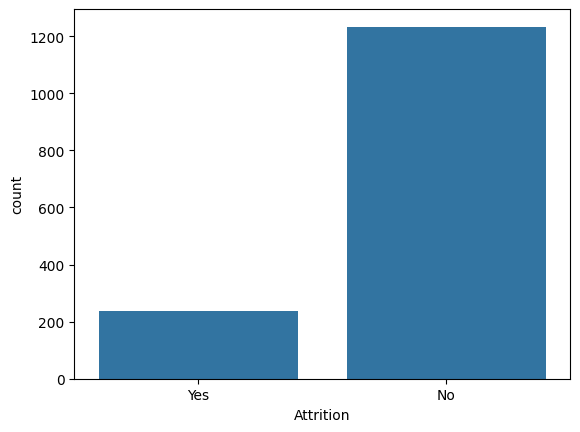

In [21]:
sns.countplot(x='Attrition', data=df)
plt.show()

Department Wise Attrition

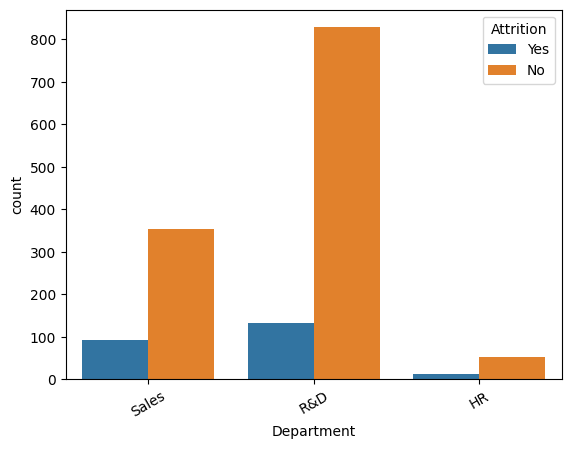

In [23]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.xticks(rotation=30)
plt.show()

Monthly Income vs Attrition

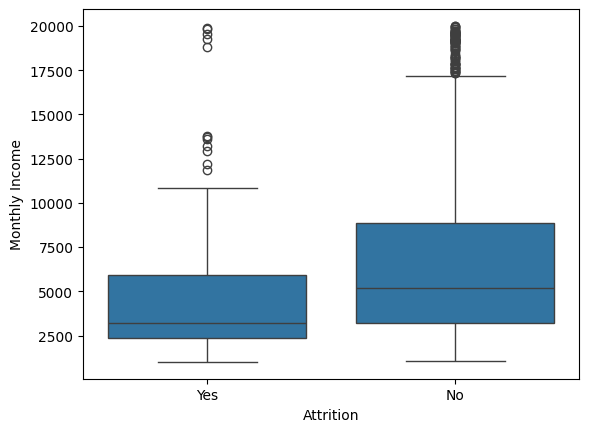

In [24]:
sns.boxplot(x='Attrition', y='Monthly Income', data=df)
plt.show()

Export and Cleaned Data

In [26]:
df.to_excel("HR_Attrition_Cleaned.xlsx", index=False)